In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
#loading dataset into a panda dataframe
med_data = pd.read_csv('/content/insurance.csv')

In [3]:
med_data.shape

(1338, 7)

In [4]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
med_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
med_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [8]:
med_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
med_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


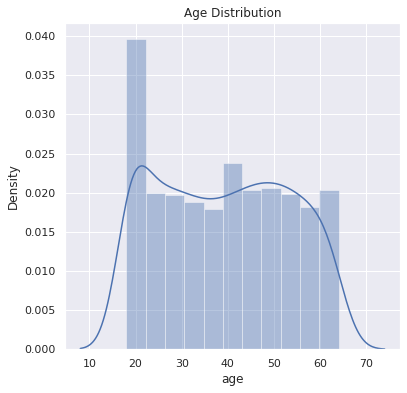

In [27]:
#distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(med_data['age'])
plt.title('Age Distribution')
plt.show()

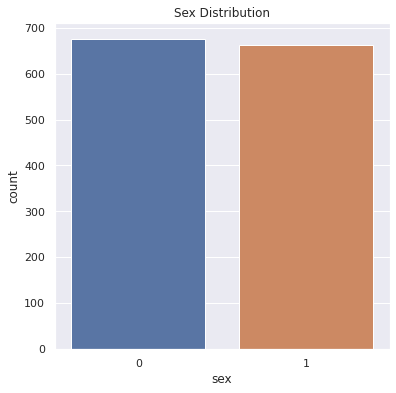

In [30]:
#distribution of sex

plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = med_data)
plt.title('Sex Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


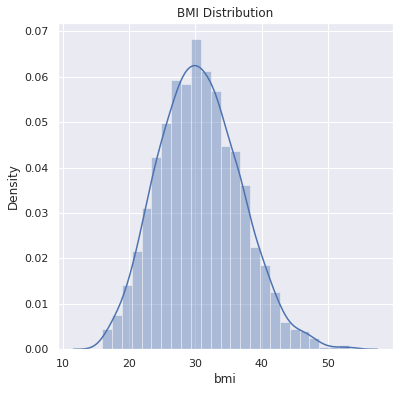

In [31]:
#distribution of bmi
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(med_data['bmi'])
plt.title('BMI Distribution')
plt.show()

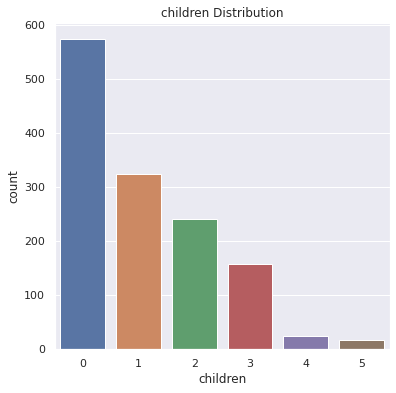

In [32]:
#distribution of children

plt.figure(figsize=(6,6))
sns.countplot(x='children',data = med_data)
plt.title('children Distribution')
plt.show()

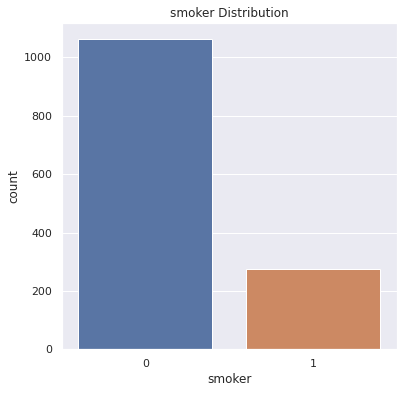

In [33]:
#distribution of smoker

plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data = med_data)
plt.title('smoker Distribution')
plt.show()

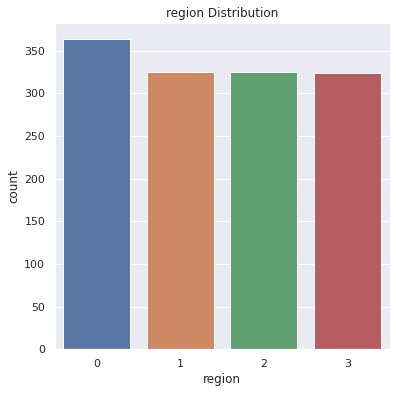

In [34]:
#distribution of region

plt.figure(figsize=(6,6))
sns.countplot(x='region',data = med_data)
plt.title('region Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


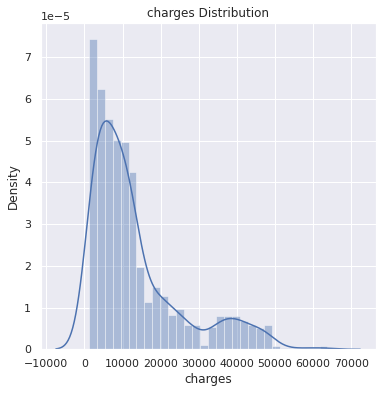

In [35]:
#distribution of charges
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(med_data['charges'])
plt.title('charges Distribution')
plt.show()

In [10]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
med_data.replace({'sex':{'male':0,'female':1},'smoker':{'yes':1,'no':0},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [12]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [13]:
X = med_data.drop(columns = 'charges',axis=1)
Y = med_data['charges']

In [14]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
X_train_prediction = model.predict(X_train)
error_score = metrics.r2_score(Y_train,X_train_prediction)
print(error_score)

0.7518195459072954


In [21]:
X_test_prediction = model.predict(X_test)
error_score = metrics.r2_score(Y_test,X_test_prediction)
print(error_score)

0.7454471618659976


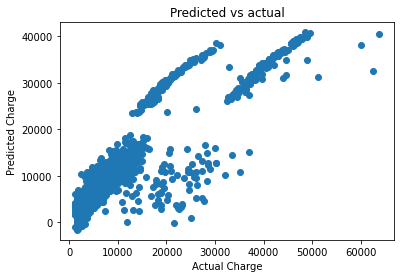

In [22]:
plt.scatter(Y_train,X_train_prediction)
plt.xlabel('Actual Charge')
plt.ylabel('Predicted Charge')
plt.title('Predicted vs actual')
plt.show()

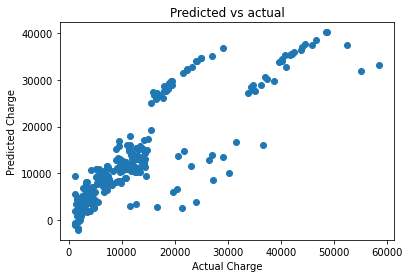

In [23]:
plt.scatter(Y_test,X_test_prediction)
plt.xlabel('Actual Charge')
plt.ylabel('Predicted Charge')
plt.title('Predicted vs actual')
plt.show()

In [36]:
input_data = (31,1,25.74,0,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[3632.02043291]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
